Womersley number:  3.1622776601683795


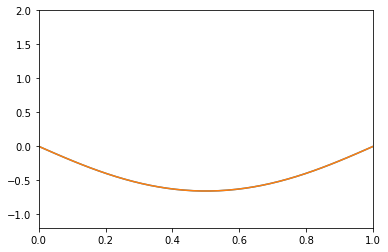

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation

mu = 0.1 #0.035 # 60 sec for arriving to periodic state
#mu = 0.1 # 25 sec for arriving to periodic state

rho = 1.
a = 1.
L = 1.
omega = 1.

T = 10*2*np.pi/omega

alpha = L*np.sqrt(omega*rho/mu)
print('Womersley number: ', alpha)

x = np.linspace(0, L, 40)

def transient(k, t):
    d = 4./(rho*np.pi*(2*k + 1)*((2*k + 1)**4*(mu/rho/L**2)**2*np.pi**4 +
                                 omega**2))
    S = np.sin(np.pi*(2*k + 1)*x/L)
    psi = ((2*k + 1)**2*mu/rho/L**2*np.pi**2*np.sin(omega*t) -
           omega*np.cos(omega*t) +
           omega*np.exp(-(2*k + 1)**2*mu/rho/L**2*np.pi**2*t))

    return a*d*S*psi

def cc(x):
    return np.cos(x)*np.cosh(x)

def ss(x):
    return np.sin(x)*np.sinh(x)

def periodic(t):
    k = np.sqrt(omega*rho/2./mu)
    xs = x - L/2
    f1 = cc(k*xs)*cc(k*L/2) + ss(k*xs)*ss(k*L/2)
    f2 = cc(k*xs)*ss(k*L/2) - ss(k*xs)*cc(k*L/2)
    f3 = cc(k*L/2)**2 + ss(k*L/2)**2
    u = a/omega*(f2/f3*np.sin(omega*t) - (1 - f1/f3)*np.cos(omega*t))
    return u

t = np.arange(0, T, 0.1)
fig, ax = plt.subplots()
ax.axis([0, L,-1.2, 2])
ptrans,=ax.plot([],[])
pper,=ax.plot([],[])
#plt.ylim(-1.2, 2)
#plt.xlim(0, L)
up = np.zeros(shape=(len(t),len(x)))
ut = np.zeros(shape=(len(t),len(x)))
              
count = 0

for t_ in t:
    ut_var = 0
    for k in range(10):
        ut_var += transient(k, t_)           
    up_var = periodic(t_)
    up[count] = up_var
    ut[count] = ut_var
    count += 1
    
    
def ani(i): 
    ptrans.set_data(x, ut[i])
    pper.set_data(x, up[i])



ani = matplotlib.animation.FuncAnimation(fig, ani, frames=len(t))
from IPython.display import HTML 
HTML(ani.to_jshtml())
